# 1) Complex Numbers in Python

In [657]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [658]:
3 + 2j

(3+2j)

In [659]:
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('The type of variable is ', type(z))

z =  (3+3j)
The type of variable is  <class 'complex'>


In [660]:
(2.75 + 3.69j) * (8.55 - 6.13j)

(46.1322+14.692000000000004j)

In [661]:
1.4 * math.e**5.32j

(0.799270785858235-1.1494199453957457j)

In [662]:
(7.51-9.15j)/(4.43+9.64j)

(-0.4880897698448308-1.0033441577191493j)

# 2) Shapes Created by the Joukowski Transformation

In [663]:
N = 50
x_start, x_end = -5.0, 5.0
y_start, y_end = -2.0, 2.0
theta=numpy.linspace(0, 2*numpy.pi, N)

In [664]:
R = 1.5      # radius
z = R*math.e**(1j*theta)
c = 1

In [665]:
def joukowski(zeta, constant):
    """
    Returns the Joukowski Transformation for z and c
    
    Parameters
    ----------
    zeta: 1D numpy array of floats
        2D complex plane
    constant: float
        constant parameter of joukowski transformation
        
    Returns
    -------
    J: 2D numpy array of floats
        joukowski transformation
    """
    J = zeta + constant**2/zeta
    return J

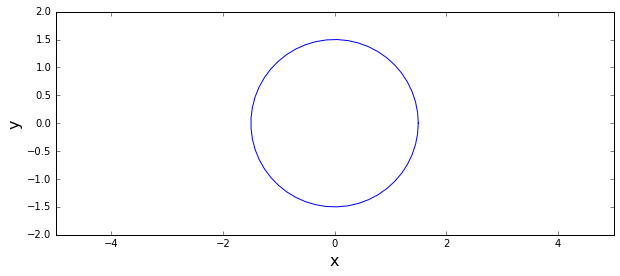

In [666]:
size = 10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(z.real, z.imag);

In [667]:
zeta = joukowski(z, c)

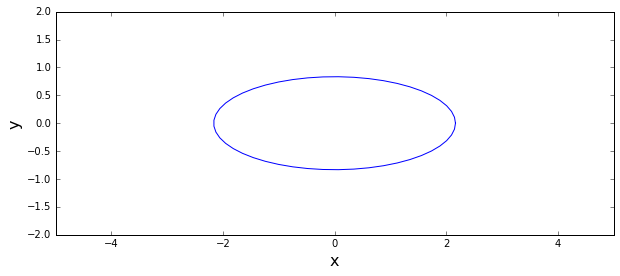

In [668]:
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(zeta.real, zeta.imag)

## Here we get an ellipse

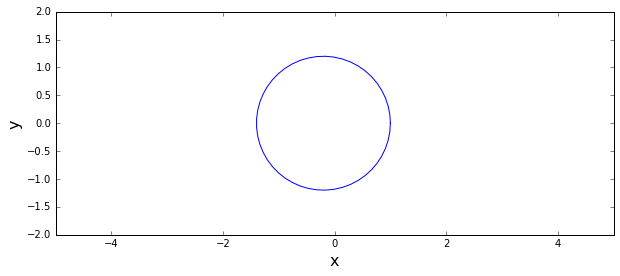

In [669]:
# choose different radius
R = 1.2
z = R*math.e**(1j*theta)+(c-R)

# plot on z-plane
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(z.real, z.imag);

In [670]:
eta = joukowski(z, c)

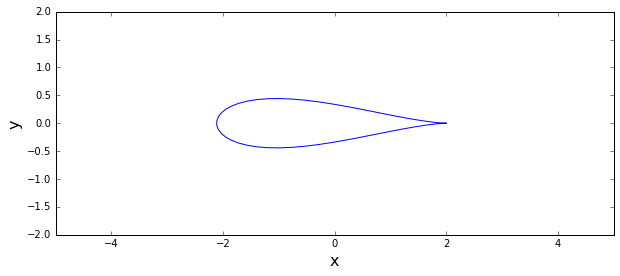

In [671]:
#plot on eta plane
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(eta.real, eta.imag);

## Here we get a symmetric airfoil

In [672]:
# define points for new center and new radius
delta_x = 0.1
delta_y = 0.1
R = math.sqrt((c+delta_x)**2+delta_y**2)

# redefine z
z = R*math.e**(1j*theta)-delta_x+delta_y*1j

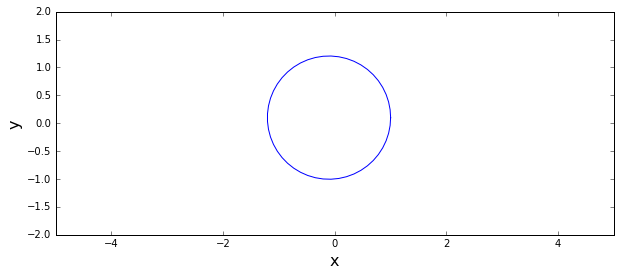

In [673]:
#plot on z plane
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(z.real, z.imag);

In [674]:
# redefine eta
eta = joukowski(z, c)

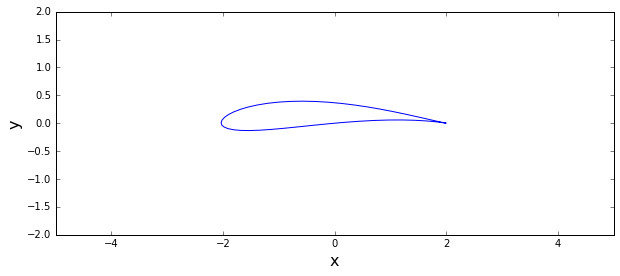

In [675]:
# plot on eta plane
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(eta.real, eta.imag);

## Here we get a cambered airfoil

## The point ($\theta$=0 or 2$\pi$, R=1.2) corresponds to the trailing edge

# 3) Grid points on the z-plane using polar coordinates

In [676]:
# end points of figure
x_start, x_end = -6.0, 6.0
y_start, y_end = -6.0, 6.0

# define radius, R, and meshgrid of r, theta
R = 1.15
r = numpy.linspace(R, 5, 100)
theta = numpy.linspace(0, 2*numpy.pi, 145)
r_mesh, theta_mesh = numpy.meshgrid(r,theta)

# define z with circle center at (-0.15, 0)
z = r_mesh*math.e**(1j*theta_mesh)-0.15

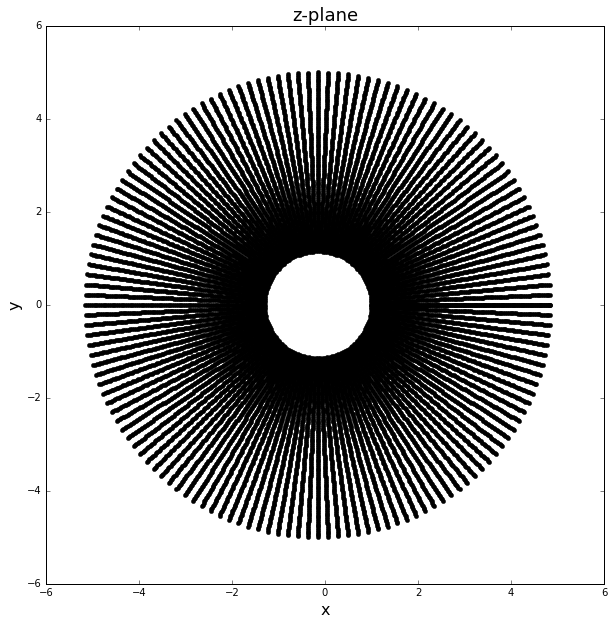

In [677]:
# plot on z-plane
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('z-plane', fontsize = 18)
pyplot.scatter(z.real, z.imag, color='black', linewidth=0.25);

In [678]:
# redefine eta
eta = joukowski(z, c)

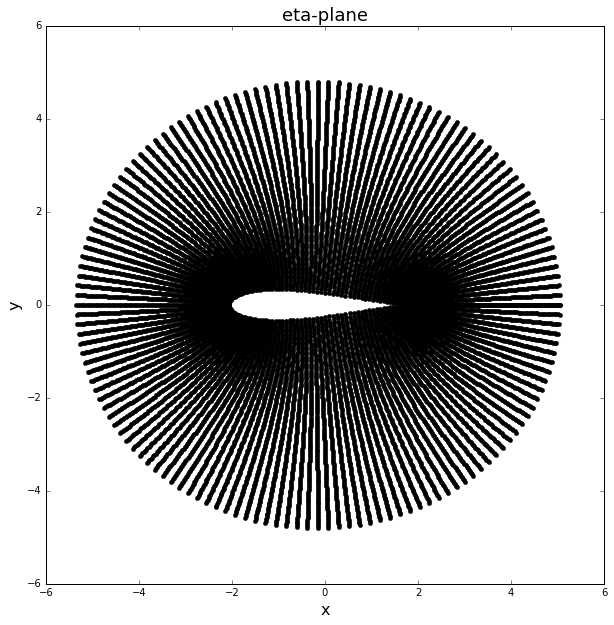

In [679]:
# plot on eta plane
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('eta-plane', fontsize=18)
pyplot.scatter(eta.real, eta.imag, color='black', linewidth=0.25, linestyle='-');

# 4) Flow over a symmetric Joukowski airfoil with 0 angle of attack

In [774]:
R = 1.15
kappa = 8.3
r = numpy.linspace(R, 5, 100)
theta = numpy.linspace(0, 2*numpy.pi, 145)
r_mesh, theta_mesh = numpy.meshgrid(r,theta)
z = r_mesh*math.e**(1j*theta_mesh)-0.15

In [775]:
u_inf = 1.0             # freestream speed
psi = (u_inf*r_mesh*numpy.sin(theta_mesh))*(1-(R**2/r_mesh)) # streamfunction

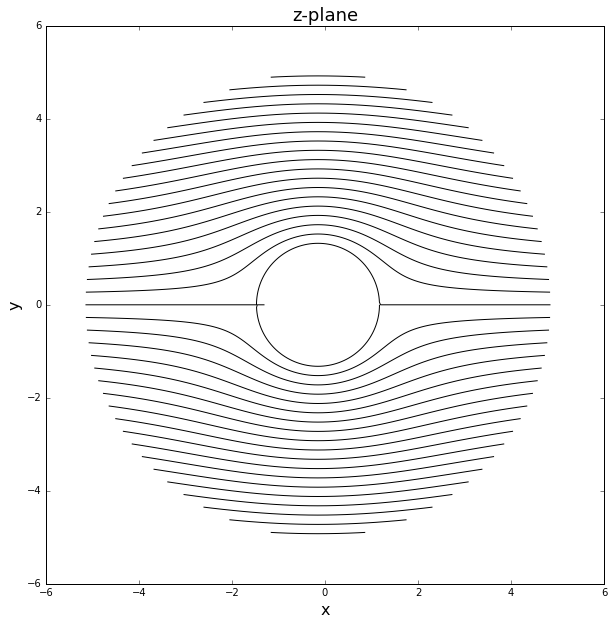

In [776]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('z-plane', fontsize = 18)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(z.real, z.imag, psi, 48, colors='black', linestyles='solid');

In [777]:
eta = joukowski(z, c)

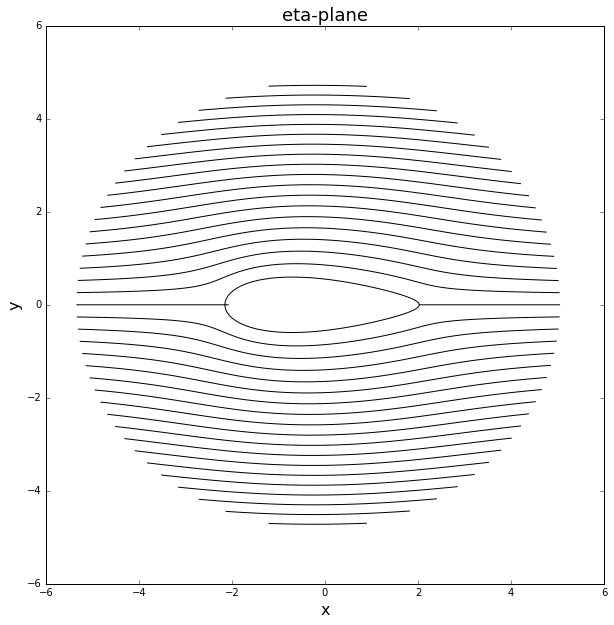

In [778]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('eta-plane', fontsize = 18)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(eta.real, eta.imag, psi, 48, colors='black', linestyles='solid');

In [790]:
# define velocities
u = (u_inf*numpy.cos(theta_mesh))*(1-(R**2/r_mesh**2))
v = - (u_inf*numpy.sin(theta_mesh))*(1+(R**2/r_mesh**2))

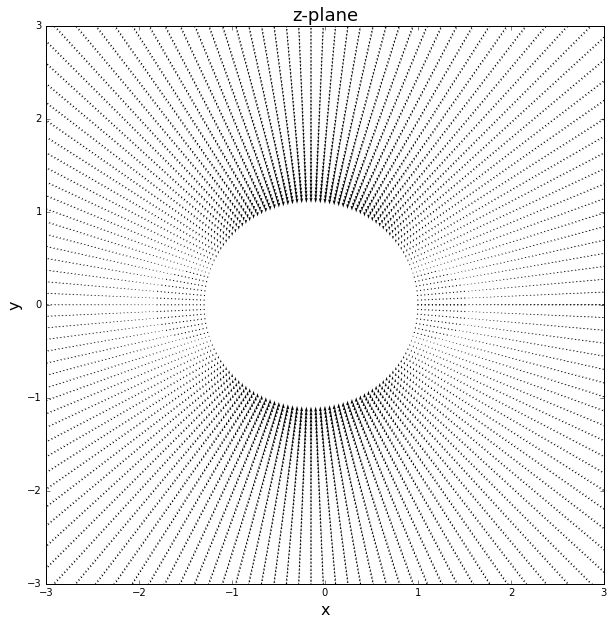

In [792]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.title('z-plane', fontsize = 18)
pyplot.quiver(z.real, z.imag, u, v);

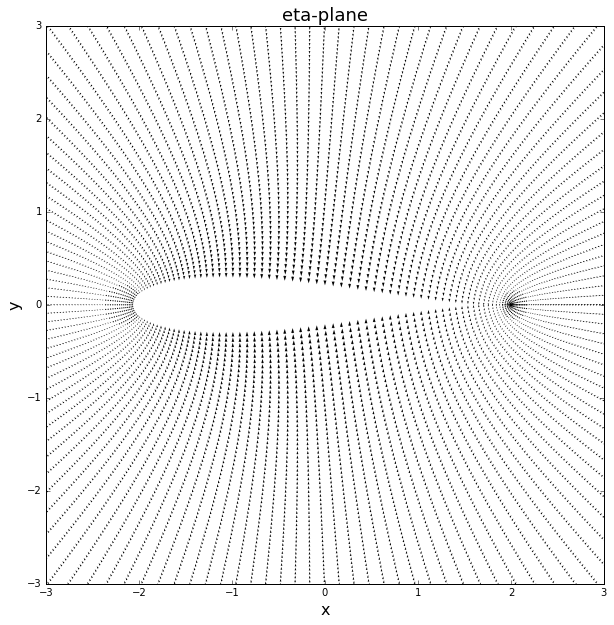

In [793]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('eta-plane', fontsize = 18)
pyplot.quiver(eta.real, eta.imag, u, v);

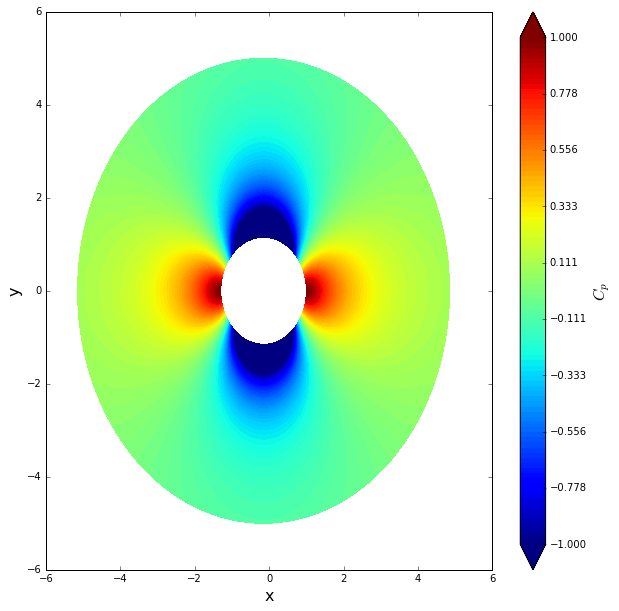

In [800]:
cp = 1.0 -(u**2+v**2)/u_inf**2

#plot pressure coefficient
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
cbar.set_ticks(numpy.linspace(-1.0, 1.0, 10))

In [803]:
eta = joukowski(z, c)

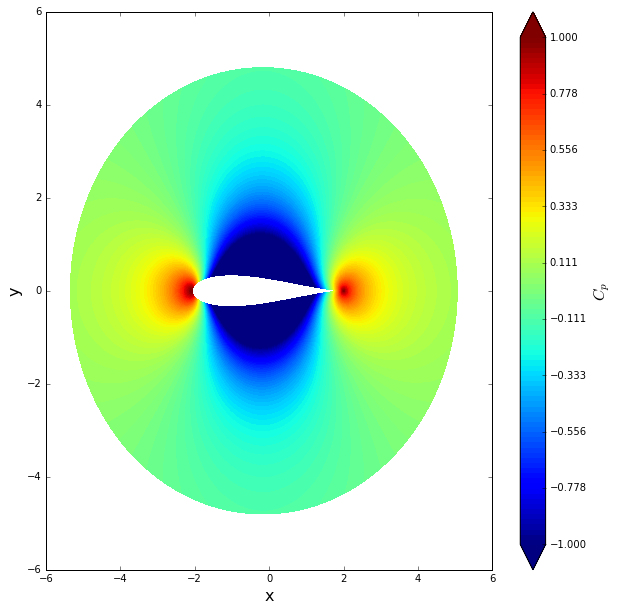

In [804]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(eta.real, eta.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
cbar.set_ticks(numpy.linspace(-1.0, 1.0, 10))

In [796]:
numpy.amin(cp)

-3.0

In [817]:
# define Ange of Attack
AoA = numpy.deg2rad(-20)

# define z'
z = r_mesh*math.e**(1j*theta_mesh)-0.15
z_prime = z*math.e**(-1j*AoA)

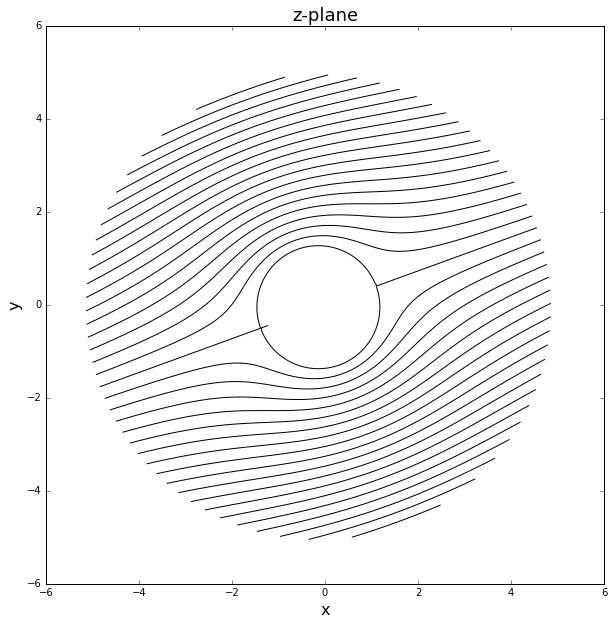

In [818]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('z-plane', fontsize = 18)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(z_prime.real, z_prime.imag, psi, 48, colors='black', linestyles='solid');

In [819]:
eta = joukowski(z_prime, c)

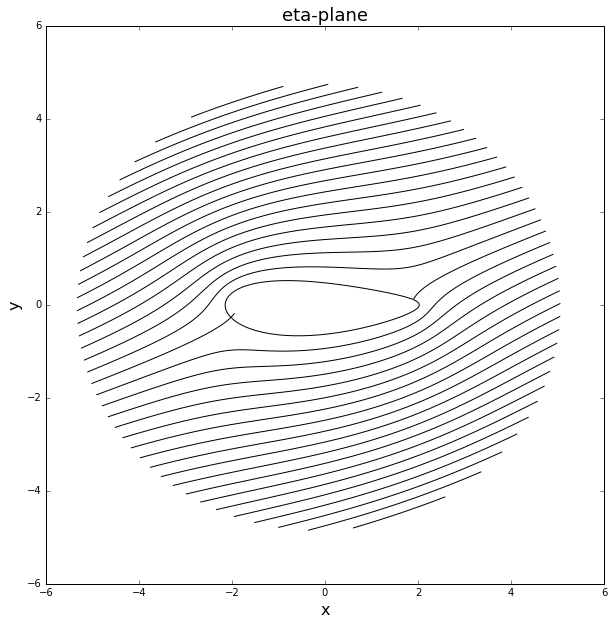

In [821]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('eta-plane', fontsize = 18)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(eta.real, eta.imag, psi, 48, colors='black', linestyles='solid');